In [1]:
import pandas as pd
df=pd.read_csv('/content/restaurant_data.csv')
df.shape

(8368, 17)

In [18]:
df.head()

,Name,Location,Cuisine,Rating,Seating Capacity,Average Meal Price,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Avg Review Length,Ambience Score,Service Quality Score,Parking Availability,Weekend Reservations,Weekday Reservations,Revenue,prediction_revunue
0,0,1,4,4.00,38,73.98,2224,23406,13,185,161.92,1.30,7.00,1,13,4,638945.52,643776.61
1,1,0,5,3.20,76,28.11,4416,42741,8,533,148.76,2.60,3.40,1,48,6,490207.83,501735.11
2,1112,1,3,4.70,48,48.29,2796,37285,18,853,56.85,5.30,6.70,0,27,14,541368.62,532434.74
3,2223,1,3,4.40,34,51.55,1167,15214,13,82,205.43,4.60,2.80,1,9,17,404556.80,409056.66
4,3334,0,4,4.90,88,75.98,3639,40171,9,78,241.68,8.60,2.10,0,37,26,1491046.35,1457851.08


In [3]:
df.dtypes

,0
Name,object
Location,object
Cuisine,object
Rating,float64
Seating Capacity,int64
Average Meal Price,float64
Marketing Budget,int64
Social Media Followers,int64
Chef Experience Years,int64
Number of Reviews,int64


In [4]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
for column in df.columns:
  if df[column].dtype == 'object' :
    df[column]=LE.fit_transform(df[column])

In [5]:
df.dtypes

,0
Name,int64
Location,int64
Cuisine,int64
Rating,float64
Seating Capacity,int64
Average Meal Price,float64
Marketing Budget,int64
Social Media Followers,int64
Chef Experience Years,int64
Number of Reviews,int64


In [6]:
x=df.drop('Revenue',axis=1)
y=df['Revenue']
from sklearn.model_selection import KFold,cross_val_score
kf=KFold(n_splits=5,shuffle=True,random_state=33)

In [7]:
y.mean()

np.float64(656070.5633508605)

In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import *
import numpy as np
all_predictions = np.zeros(len(df))
mse_score=[]
rmse_score=[]
r2_score_list=[]
for i,j in kf.split(x):
  x_train, x_test=x.iloc[i],x.iloc[j]
  y_train,y_test=y.iloc[i],y.iloc[j]

  model=RandomForestRegressor(n_estimators=100,random_state=33)
  model.fit(x_train,y_train)

  y_pred=model.predict(x_test)
  all_predictions[j] = y_pred
  mse_score.append(mean_squared_error(y_test,y_pred))
  rmse_score.append(np.sqrt(mean_squared_error(y_test,y_pred)))
  r2_score_list.append(r2_score(y_test,y_pred))


In [9]:
print('mse : ',np.mean(mse_score))
print('rmse : ',np.mean(rmse_score))
print('r2 score : ',np.mean(r2_score_list))

mse :  62857365.24850377
rmse :  7924.387606002585
r2 score :  0.9991198514174908


In [22]:
df['Revenue']

,Revenue
0,638945.52
1,490207.83
2,541368.62
3,404556.80
4,1491046.35
...,...
8363,434653.45
8364,414977.92
8365,930395.87
8366,311493.48


In [10]:
pd.options.display.float_format = '{:.2f}'.format
df['prediction_revunue'] = all_predictions
display(df['prediction_revunue'])

,prediction_revunue
0,643776.61
1,501735.11
2,532434.74
3,409056.66
4,1457851.08
...,...
8363,436522.76
8364,416731.96
8365,928621.61
8366,320880.26


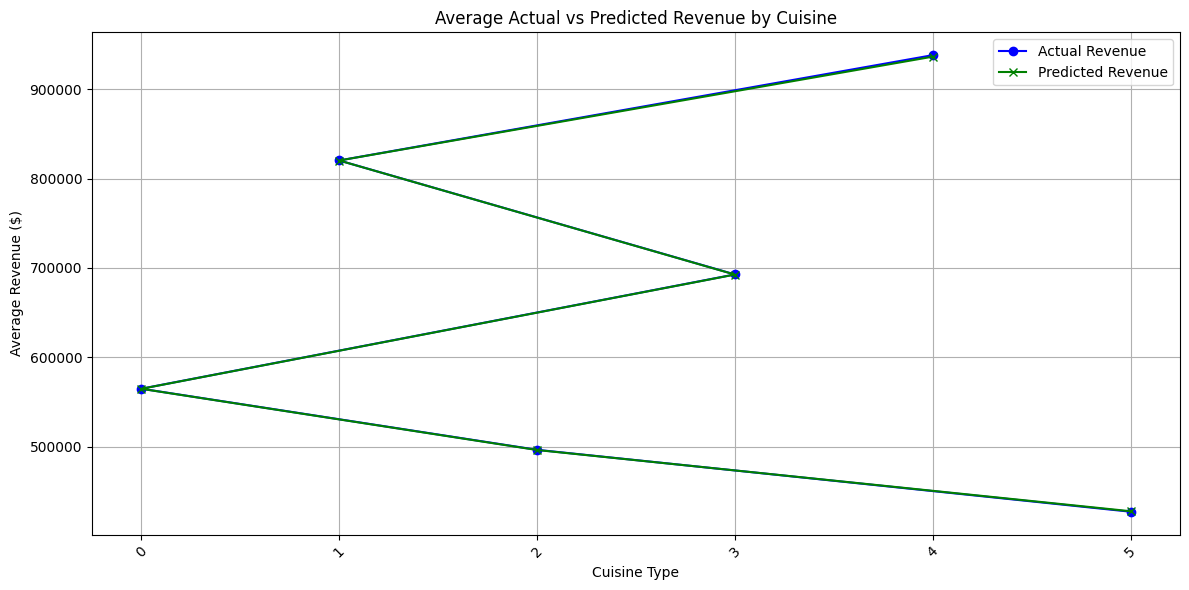

In [21]:
import matplotlib.pyplot as plt
grouped_by_cuisine = df.groupby('Cuisine').agg({
    'Revenue': 'mean',
    'prediction_revunue': 'mean'
}).reset_index()
grouped_by_cuisine = grouped_by_cuisine.sort_values(by='Revenue', ascending=False)
plt.figure(figsize=(12, 6))
plt.plot(grouped_by_cuisine['Cuisine'], grouped_by_cuisine['Revenue'], label='Actual Revenue', marker='o', color='blue')
plt.plot(grouped_by_cuisine['Cuisine'], grouped_by_cuisine['prediction_revunue'], label='Predicted Revenue', marker='x', color='green')
plt.title('Average Actual vs Predicted Revenue by Cuisine')
plt.xlabel('Cuisine Type')
plt.ylabel('Average Revenue ($)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
